4.9\. Analyze a data file (15 MINUTES)
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [11]:
# download the file
%%bash
cat populations.txt

SyntaxError: invalid syntax (766970799.py, line 3)

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300



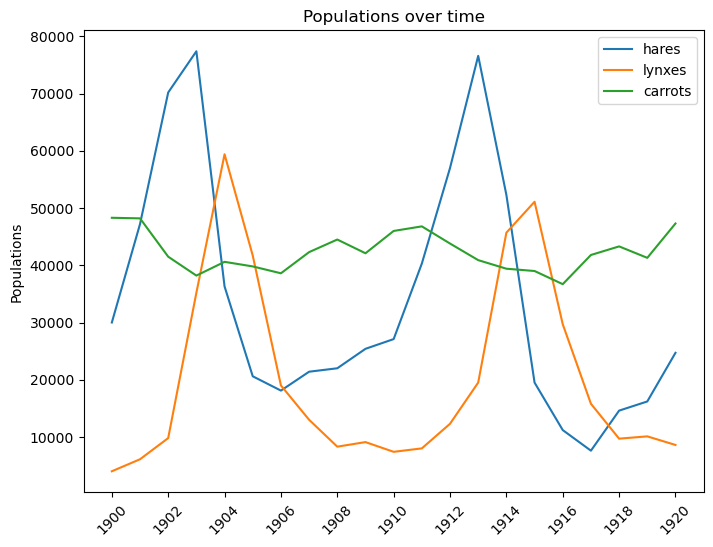

The mean of the hares population over 20 years is: 34080.95238095238
Its standard deviation is: 20897.906458089667
The mean of the lynxes population over 20 years is: 20166.666666666668
Its standard deviation is: 16254.591536908763
The mean of the carrots population over 20 years is: 42400.0
Its standard deviation is: 3322.5062255844787
The correlation between 0 and 1 is: [[1.         0.07189206]
 [0.07189206 1.        ]]
The correlation between 0 and 2 is: [[ 1.         -0.01660378]
 [-0.01660378  1.        ]]
The correlation between 1 and 2 is: [[ 1.         -0.68057717]
 [-0.68057717  1.        ]]
the highest population in the year 1901 is: 48200.0
the highest population in the year 1902 is: 70200.0
the highest population in the year 1903 is: 77400.0
the highest population in the year 1904 is: 59400.0
the highest population in the year 1905 is: 41700.0
the highest population in the year 1906 is: 38600.0
the highest population in the year 1907 is: 42300.0
the highest population in th

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# checking the content of the file
def visualize_file(population):
    try:
        with open(population, 'r') as file:
            content_of_the_file = file.read()
            print(content_of_the_file)
    except FileNotFoundError:
        print(f"il file non è stato trovato")

# call of the function to visualize the content of the file
visualize_file('C:\\Users\\NickBello\\Downloads\\populations.txt')

# load of the file
data = np.loadtxt('C:\\Users\\NickBello\\Downloads\\populations.txt')   # if needed, put the whole file path

# creation of the columns using the transposition trick
years = data[:, 0].astype(int)
species = {
    "hares": data[:, 1],
    "lynxes": data[:, 2],
    "carrots" : data[:, 3]
}
keys_list = list(species.keys())

# plotting the 3 populations over the years
plt.figure(figsize=(6, 4))
plt.title('Populations over time')
plt.plot(years, species['hares'], label='hares')
plt.plot(years, species['lynxes'], label='lynxes')
plt.plot(years, species['carrots'], label='carrots')
plt.legend()                                                 # non serve specificare cosa stiamo plottando
plt.xticks(years[::2], rotation=45)
plt.ylabel('Populations')
plt.show()

# statistical features of the data
time_interval = np.max(years) - np.min(years)
for animal in keys_list:
    d = species[animal]
    print(f"The mean of the {animal} population over {time_interval} years is: {np.mean(d)}")
    print(f"Its standard deviation is: {np.std(d)}")

# looking for correlations
for i in range(len(keys_list)):
    for j in range(i+1, len(keys_list)):
        specie1 = keys_list[i]
        specie2 = keys_list[j]
        corr = np.corrcoef(species[specie1], species[specie2])
        print(f"The correlation between {i} and {j} is: {corr}")

# looking for the maximum population each year
for idx in range(1, len(years)):
    row = data[idx, :]
    max_population = np.max(row[1:])
    print(f"the highest population in the year {years[idx]} is: {max_population}")

9.2\. **Curve fitting of temperature in Alaska** (20 MINUTES)

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

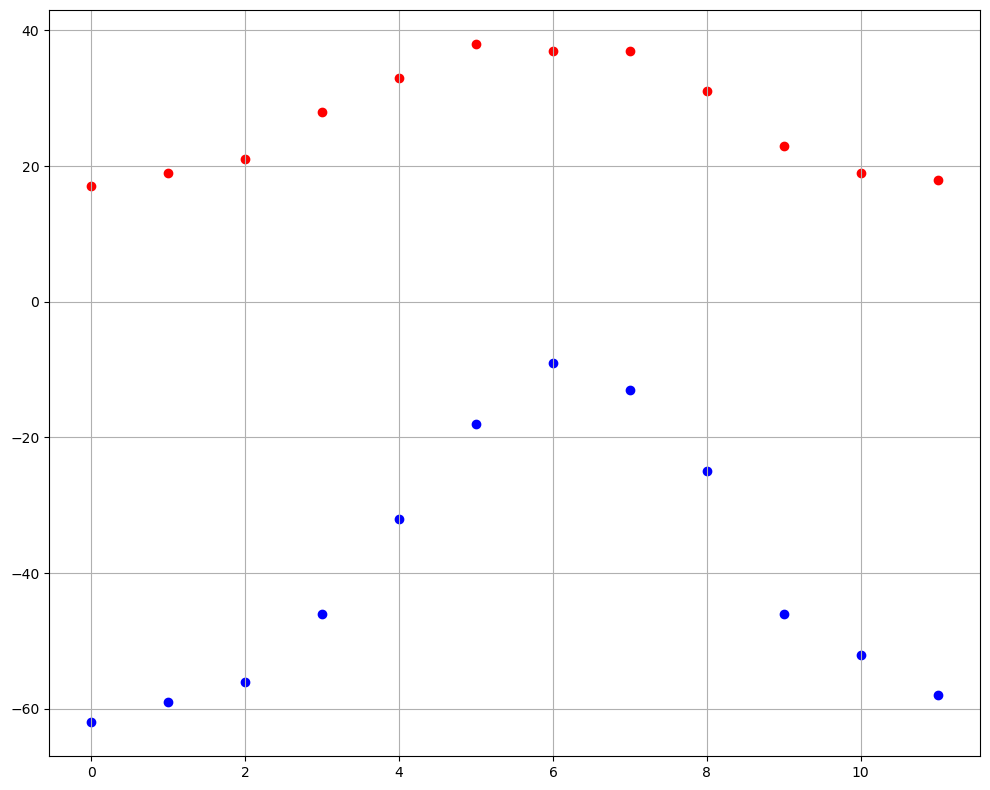

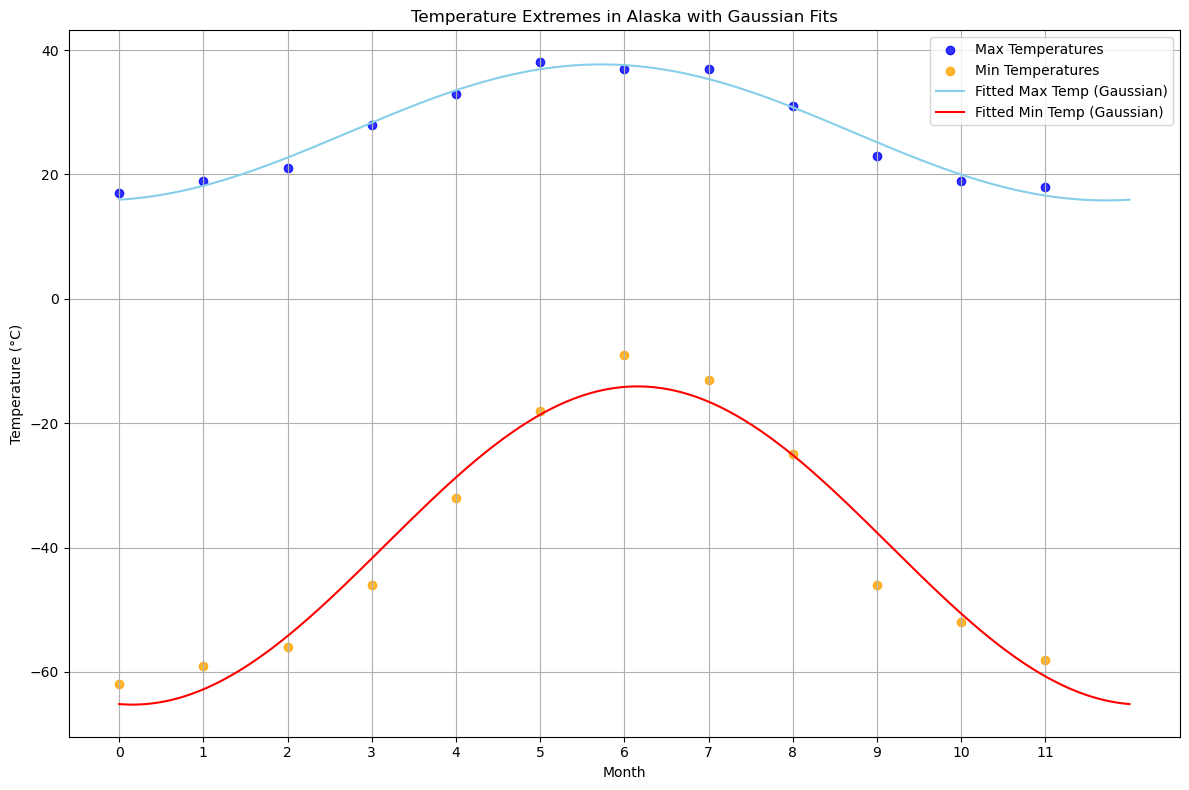

In [32]:
# plotting the temperatures
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import curve_fit

max_temperatures = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temperatures = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(0, 12, 1)
plt.figure(figsize=(6, 4))
plt.scatter(months, max_temperatures, color='red', label='Max temperature over the year in alaska')
plt.scatter(months, min_temperatures, color='blue', label='Min temperature over the year in alaska')
plt.title("Temperature Extremes in Alaska")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# definition of a function that can replicate the max/min temperatures approximately
def simulate_temperature(x, A, B, bias):
    w = 2*np.pi/12
    return A*np.sin(w*x + bias) + B

# fitting the function with scipy
popt_max, pcov_max =  curve_fit(simulate_temperature, months, max_temperatures, p0=[1, 1, 10])
A_max, B_max, bias_max = popt_max
popt_min, pcov_min =  curve_fit(simulate_temperature, months, min_temperatures, p0=[1, 1, -5])
A_min, B_min, bias_min = popt_min

# creation of an array and fitting of the function
data = np.linspace(0, 12-1e-4, 365)
f_max = simulate_temperature(data, A_max, B_max, bias_max)
f_min = simulate_temperature(data, A_min, B_min, bias_min)

plt.figure(figsize=(6, 4))
plt.scatter(months, max_temperatures, color='blue', label='Max Temperatures', alpha=0.8)
plt.scatter(months, min_temperatures, color='orange', label='Min Temperatures', alpha=0.8)
plt.plot(data, f_max, color='skyblue', label='Fitted Max Temp (Gaussian)')
plt.plot(data, f_min, color='red', label='Fitted Min Temp (Gaussian)')
plt.title("Temperature Extremes in Alaska with Gaussian Fits")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(months)  
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

10.1\. **Radioactive decay chain** (30 MINUTES)

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

After 3299 iterations and a time 3299 the simulation has stopped.


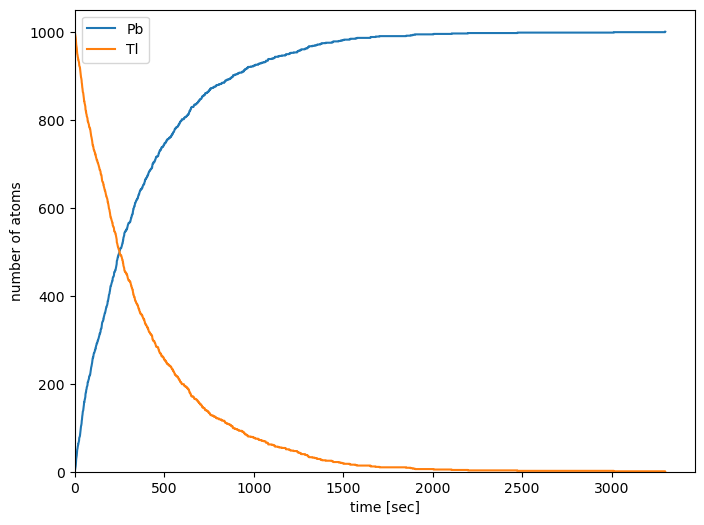

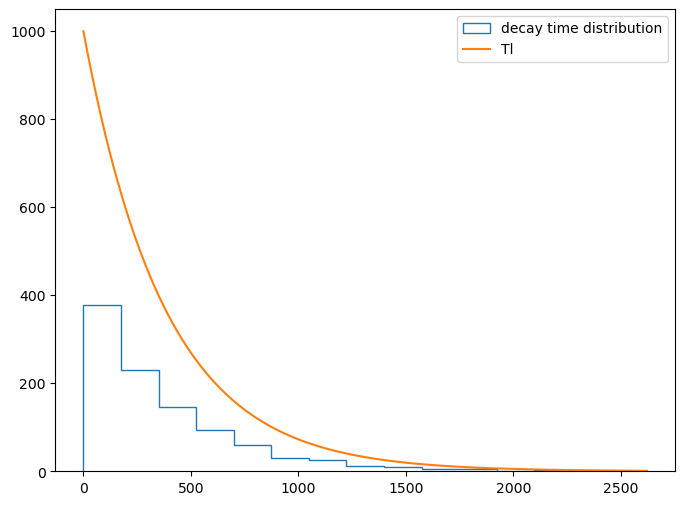

In [28]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd
'''
EXERCISE FIRST PART: define a time step
          define the numbers of Th and Pb initially
          define the function to compute the probability of decayment
          initialize the time of the simulation
          ciclo while per runnare la simulazione
          sistemazione delle variabili per la visualizzazione
          plot della simulazione
'''


Thallium_initial = 1000                   # atomi iniziali di Tallio
dt = 1                                    # time step of 1 second
tau = 3.052*60 / m.log(2)                 # decay constant tau

def decay_probability(t):                 # function that compute the probability to have decayment
    return 1-2**(-t/tau)

decayment_probability = np.random.uniform(0, 1, Thallium_initial) 
tt = 0                                    # time in simulation
B = [0]                                   # list for Pb atoms
decayed_atoms = 0                         # initialize the number of atoms decayed 

while decayed_atoms < Thallium_initial:
    tt += dt
    decayed_atoms = np.sum(decayment_probability < decay_probability(tt))
    B.append(decayed_atoms)

print(f"At time {tt} the simulation has stopped.")

B[-1] = Thallium_initial
B = np.array(B)
Thallium_survived = Thallium_initial - B
t = np.arange(0, tt+dt, dt)

# PLOTTING 
plt.figure(figsize=(8, 6))                # dimensions of the plot
plt.plot(t, B, label='Pb')
plt.plot(t, Thallium_survived, label='Tl')
plt.xlabel('time [sec]')
plt.ylabel('number of atoms')
plt.legend()
plt.xlim(0, t[-1]*21/20)                  # imposing limits on y and x axes for a better visualization
plt.ylim(0, B[-1]*21/20)
plt.show()


'''
EXERCISE SECOND PART: define the inverse cumulative function
                      define and sort 
'''

def time_to_decay(x): return -tau*np.log2(1-x)    # inverse cumulative function of the exponential

x = np.random.random(Thallium_initial)            # generating number of events
x = np.sort(x)
t_decay = time_to_decay(x)                        # finding the time to happen 1000 decayments

plt.figure(figsize=(8, 6))
plt.hist(t_decay, histtype='step', bins=15, label='decay time distribution')
plt.plot(t_decay, (1-x)*Thallium_initial, label='Tl')
plt.legend()
plt.show()

9.3\. **2D minimization of a six-hump camelback function** (20 MINUTES)

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


The minimums are found at: [-0.08984199  0.71265639] with value -1.0316284534898743, starting with initial guess: [(-1, 0.9), (1, -0.9)]
The minimums are found at: [ 0.08984198 -0.7126564 ] with value -1.0316284534898734, starting with initial guess: [(-1, 0.9), (1, -0.9)]


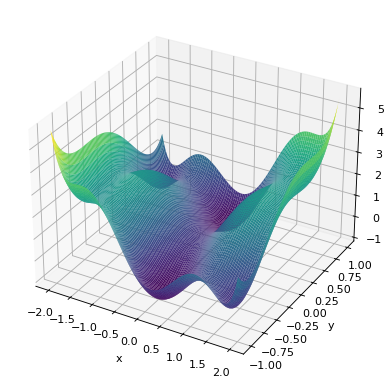

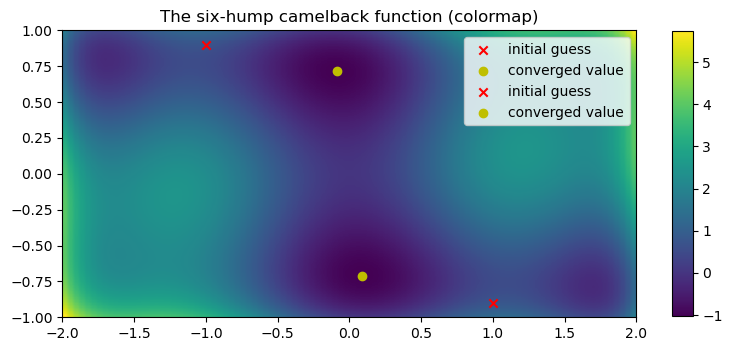

In [17]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 

# definition of the function to compute
def function(x, y):
    return (4 - 2.1*x**2 + (x**4)/3) * x**2 + x*y + (4*y**2 - 4) * y**2

# definition of the function as requested by the scipy optimizator
def f_optimization(X):
    return function(X[0], X[1])

# initialization of the variables
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# call of the function
Z = function(X, Y)

# plotting of the 3d surface
fig = plt.figure(figsize=(10, 10), dpi=80)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')  # rstride/cstride = 1 fanno si che vengano utilizzate tutte le righe/colonne per il plot della superficie
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

guesses, minimum = [], []

# restricting to upper quadrants ( y > 0.01)
bounds, x0  = [(-2,2),(0.01,1)], (-1, 0.9)
optimal = sp.optimize.minimize(f_optimization, x0, bounds=bounds)
guesses.append(x0)
minimum.append(optimal.x)

# restricting to lower quadrants ( y < -0.01)
bounds, x0  = [(-2,2),(-1,-0.01)], (1, -0.9)
optimal = sp.optimize.minimize(f_optimization, x0, bounds=bounds)
guesses.append(x0)
minimum.append(optimal.x)

# plotting with
plt.figure(figsize=(8, 6))
plt.imshow(function(X, Y), extent=[-2, 2, -1, 1], origin="lower")
plt.colorbar(shrink=0.5, aspect=20*0.7)
plt.title('The six-hump camelback function (colormap)')

# scatter plot of the minimum
for idx, x0 in enumerate(guesses):
    mm = minimum[idx]
    print(f"The minimums are found at: {mm} with value {f_optimization(mm)}, starting with initial guess: {guesses}")
    plt.scatter(x0[0], x0[1], color='r', marker='x', label='initial guess')
    plt.scatter(mm[0], mm[1], color='y', label='converged value')   

plt.tight_layout()
plt.legend()
plt.show()